In [1]:
#install the kaggle library
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!ls -l ~/.kaggle/kaggle.json


-rw------- 1 root root 75 May 13 21:55 /root/.kaggle/kaggle.json


**importing the dog vs cat dataset from kaggle**

In [4]:
!kaggle datasets list


ref                                                          title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance         Student Habits vs Academic Performance                    19512  2025-04-12 10:49:08.663000          21038        357  1.0              
adilshamim8/cost-of-international-education                  Cost of International Education                           18950  2025-05-07 15:41:53.213000           3442         56  1.0              
fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid      Heart Attack Dataset                                      16250  2025-04-30 21:58:22.740000           4022         70  1.0              
ivankmk/th

In [5]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

 96% 776M/812M [00:07<00:00, 285MB/s]
100% 812M/812M [00:07<00:00, 115MB/s]


In [6]:
#for see all the files of directory
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [7]:
#extractiong the zip dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is exxtracted')

The dataset is exxtracted


In [8]:
#extractiong the zip dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is exxtracted')

The dataset is exxtracted


In [9]:
import os

In [10]:
#counting number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


Printing the number of **images**

In [11]:
files_name = os.listdir('/content/train')
print(files_name)

['cat.4388.jpg', 'dog.8364.jpg', 'cat.2547.jpg', 'dog.10336.jpg', 'dog.847.jpg', 'dog.1332.jpg', 'dog.11064.jpg', 'dog.2883.jpg', 'dog.735.jpg', 'dog.2973.jpg', 'dog.9600.jpg', 'dog.497.jpg', 'cat.5096.jpg', 'cat.11171.jpg', 'dog.5075.jpg', 'cat.1381.jpg', 'cat.4661.jpg', 'cat.10050.jpg', 'cat.4055.jpg', 'cat.6814.jpg', 'cat.9102.jpg', 'cat.10738.jpg', 'dog.10403.jpg', 'dog.6365.jpg', 'dog.4501.jpg', 'dog.11223.jpg', 'cat.7845.jpg', 'cat.1002.jpg', 'dog.896.jpg', 'dog.9969.jpg', 'dog.694.jpg', 'cat.1931.jpg', 'dog.3139.jpg', 'dog.2536.jpg', 'dog.5412.jpg', 'cat.7663.jpg', 'cat.7264.jpg', 'cat.11570.jpg', 'cat.890.jpg', 'dog.9101.jpg', 'dog.4233.jpg', 'cat.6989.jpg', 'cat.4285.jpg', 'cat.3374.jpg', 'dog.1507.jpg', 'dog.7768.jpg', 'cat.10676.jpg', 'dog.10293.jpg', 'dog.6883.jpg', 'dog.4025.jpg', 'cat.7060.jpg', 'cat.4488.jpg', 'cat.7356.jpg', 'dog.1377.jpg', 'cat.11108.jpg', 'dog.6567.jpg', 'dog.10306.jpg', 'dog.5994.jpg', 'cat.10453.jpg', 'dog.4785.jpg', 'dog.2048.jpg', 'cat.3552.jpg', 

**Importing dependencies**

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg

**Diaplay the images of dog and cat**

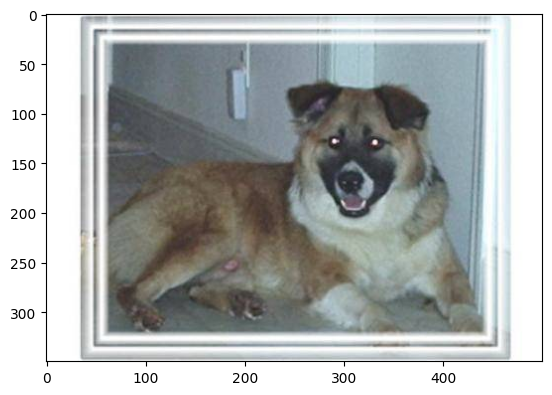

In [13]:
#display dog image
img = mpimg.imread('/content/train/dog.8114.jpg')
imgmlt = plt.imshow(img)
plt.show()

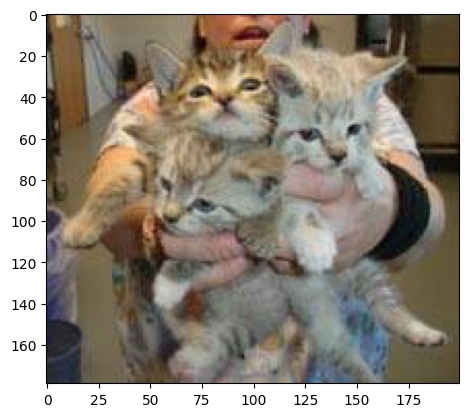

In [14]:
#display cat image
img = mpimg.imread('/content/train/cat.11924.jpg')
imgmlt = plt.imshow(img)
plt.show()

In [15]:
#get first 3 chrecter of images name

file_names = os.listdir('/content/train/')

#for 1st 5 images
for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
dog
cat
dog
dog


In [16]:
#count number dog and cat image
file_names = os.listdir ('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images: ',dog_count)
print('Number of cat images: ',cat_count)


Number of dog images:  12500
Number of cat images:  12500


**Resize the images**

In [17]:
#create a directory for resized images
os.mkdir('/content/resized images')

In [18]:
#Resized first 2000 images
#resized images will be 240x240
#resized images will be RGB

original_folder = '/content/train/'
resized_folder = '/content/resized images/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImagePath = resized_folder+filename
  img.save(newImagePath)


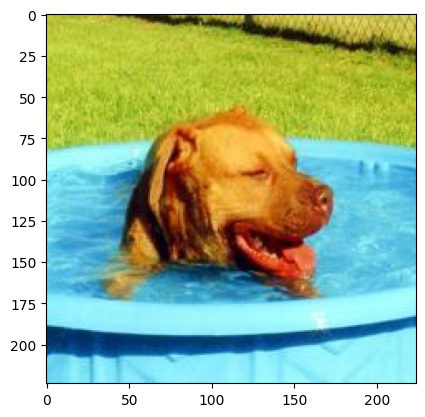

In [22]:
#display dog image
img = mpimg.imread('/content/resized images/dog.10336.jpg')
imgmlt = plt.imshow(img)
plt.show()

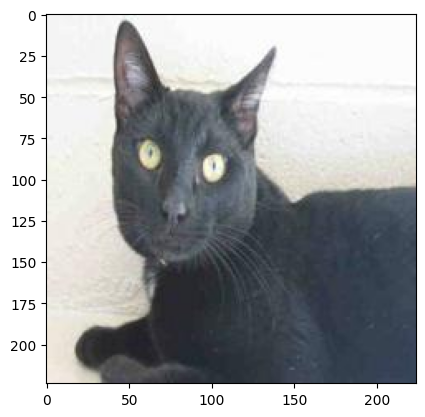

In [24]:
#display cat image
img = mpimg.imread('/content/resized images/cat.4388.jpg')
imgmlt = plt.imshow(img)
plt.show()

**creating labels for resized images of dogs and cats**

**dog --> 1**

**cat --> 0**

In [25]:
filenames = os.listdir('/content/resized images/')

labels = []

for i in range(2000):
  file_names = filenames[i]
  label = file_names[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [26]:
print(filenames[0:5])
print(len(filenames))

['cat.4388.jpg', 'dog.8364.jpg', 'cat.2547.jpg', 'dog.10336.jpg', 'dog.847.jpg']
2000


In [27]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 1, 1]
2000


In [28]:
#counting the images of dogs and cats out of 2000 images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1031  969]


Converting all the resized images to numpy array

In [29]:
import cv2
import glob

In [30]:
image_directory = '/content/resized images/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [31]:
print(dog_cat_images)

[[[[244 244 244]
   [244 244 244]
   [244 244 244]
   ...
   [252 252 252]
   [252 252 252]
   [252 252 252]]

  [[244 244 244]
   [244 244 244]
   [244 244 244]
   ...
   [252 252 252]
   [252 252 252]
   [252 252 252]]

  [[244 244 244]
   [244 244 244]
   [244 244 244]
   ...
   [252 252 252]
   [252 252 252]
   [252 252 252]]

  ...

  [[230 237 246]
   [229 236 245]
   [228 235 244]
   ...
   [ 88  69  54]
   [ 88  69  54]
   [ 88  69  54]]

  [[232 239 248]
   [231 238 247]
   [229 236 245]
   ...
   [ 88  69  54]
   [ 88  69  54]
   [ 88  69  54]]

  [[233 240 249]
   [232 239 248]
   [230 237 246]
   ...
   [ 88  69  54]
   [ 88  69  54]
   [ 88  69  54]]]


 [[[250 255 250]
   [250 255 250]
   [252 255 251]
   ...
   [249 251 252]
   [249 251 252]
   [249 251 252]]

  [[250 255 250]
   [250 255 250]
   [252 255 251]
   ...
   [249 251 252]
   [249 251 252]
   [249 251 252]]

  [[250 255 250]
   [250 255 250]
   [252 255 251]
   ...
   [249 251 252]
   [249 251 252]
   [249 251

In [32]:
type(dog_cat_images)

numpy.ndarray

In [33]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [34]:
x = dog_cat_images

#conver labels into numpy array and store in y
y= np.asarray(labels)

**Train Test Split**

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [36]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [37]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [38]:
print(x_train_scaled)

[[[[0.54509804 0.52941176 0.45490196]
   [0.52156863 0.50980392 0.42745098]
   [0.52156863 0.50980392 0.42745098]
   ...
   [0.47843137 0.42745098 0.36470588]
   [0.50196078 0.45098039 0.38823529]
   [0.47843137 0.42745098 0.36470588]]

  [[0.47843137 0.4627451  0.38823529]
   [0.4745098  0.45882353 0.38431373]
   [0.49411765 0.48235294 0.4       ]
   ...
   [0.47058824 0.41960784 0.35686275]
   [0.49019608 0.43921569 0.37647059]
   [0.48235294 0.43137255 0.36862745]]

  [[0.43921569 0.43137255 0.36078431]
   [0.44313725 0.43921569 0.36078431]
   [0.45882353 0.45490196 0.37647059]
   ...
   [0.44705882 0.39607843 0.33333333]
   [0.48627451 0.43529412 0.37254902]
   [0.50980392 0.45882353 0.39607843]]

  ...

  [[0.81568627 0.76470588 0.58431373]
   [0.70980392 0.67058824 0.48627451]
   [0.59215686 0.56470588 0.37254902]
   ...
   [0.34901961 0.42745098 0.49411765]
   [0.35686275 0.43529412 0.50196078]
   [0.39607843 0.4745098  0.54117647]]

  [[0.74117647 0.69019608 0.51764706]
   [0.6

**Building Neural Netword**

In [39]:
import tensorflow as tf
import tensorflow_hub as hub

In [54]:
#install tf_keras and import

!pip install tf_keras
import tf_keras

In [51]:
# Define the pretrained model outside the Sequential model
pretrained_model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"
pretrained_model = hub.KerasLayer(pretrained_model_url, input_shape=(224, 224, 3), trainable=False)

In [57]:
num_of_classes = 2

model = tf_keras.Sequential([

    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [59]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [60]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 58s 1s/step - loss: 0.1693 - acc: 0.9431
Epoch 2/5
50/50 [==============================] - 52s 1s/step - loss: 0.0722 - acc: 0.9744
Epoch 3/5
50/50 [==============================] - 51s 1s/step - loss: 0.0529 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 51s 1s/step - loss: 0.0441 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 53s 1s/step - loss: 0.0322 - acc: 0.9944


**Model Evaluation**

In [61]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test Loss = ', score)
print('Test Accuracy = ', acc)

13/13 [==============================] - 14s 1000ms/step - loss: 0.0484 - acc: 0.9775
Test Loss =  0.0484173409640789
Test Accuracy =  0.9775000214576721


**Prediction System**

Path of the image to be predicted:/content/dog2.jfif


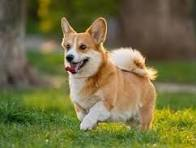

1/1 [==============================] - 0s 48ms/step
[[-0.6933914   0.13254413]]
1
The given image belongs to the class dog


In [66]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The given image belongs to the class Cat')

else:
  print('The given image belongs to the class dog')

Path of the image to be predicted:/content/cat.jfif


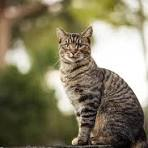

1/1 [==============================] - 0s 52ms/step
[[ 4.3620934 -4.3337026]]
0
The given image belongs to the class Cat


In [68]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The given image belongs to the class Cat')

else:
  print('The given image belongs to the class dog')

**Save a train Pickle file**

In [69]:
import pickle

# ... (your existing code) ...

# After training the model (after model.fit)
with open('dog_cat_model.pkl', 'wb') as file:
  pickle.dump(model, file)

print("Model saved as dog_cat_model.pkl")

Model saved as dog_cat_model.pkl
